**Objectives**

- Perform a linear regression model to analyze what makes a film successful
- Test the model for the assumptions of a linear regression model
- Use the coefficients to make recommendations on how to make a successful movie. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector

**Compiling the Data**

In [12]:
tmdb_2000=pd.read_csv(r'Data/final_tmdb_data_2000.csv.gz')
tmdb_2001=pd.read_csv(r'Data/final_tmdb_data_2001.csv.gz')
tmdb_2002=pd.read_csv(r'Data/final_tmdb_data_2002.csv.gz')
tmdb_2003=pd.read_csv(r'Data/final_tmdb_data_2003.csv.gz')
tmdb_2004=pd.read_csv(r'Data/final_tmdb_data_2004.csv.gz')
tmdb_2005=pd.read_csv(r'Data/final_tmdb_data_2005.csv.gz')
tmdb_2006=pd.read_csv(r'Data/final_tmdb_data_2006.csv.gz')
tmdb_2007=pd.read_csv(r'Data/final_tmdb_data_2007.csv.gz')
tmdb_2008=pd.read_csv(r'Data/final_tmdb_data_2008.csv.gz')
tmdb_2009=pd.read_csv(r'Data/final_tmdb_data_2009.csv.gz')

In [13]:
data1=pd.concat([tmdb_2000,tmdb_2001,tmdb_2002,tmdb_2003,tmdb_2004,tmdb_2005,tmdb_2006,tmdb_2007,tmdb_2008,tmdb_2009], axis=0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16085 entries, 0 to 2358
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                16085 non-null  object 
 1   adult                  16075 non-null  float64
 2   backdrop_path          8299 non-null   object 
 3   belongs_to_collection  1194 non-null   object 
 4   budget                 16075 non-null  float64
 5   genres                 16075 non-null  object 
 6   homepage               2680 non-null   object 
 7   id                     16075 non-null  float64
 8   original_language      16075 non-null  object 
 9   original_title         16075 non-null  object 
 10  overview               15683 non-null  object 
 11  popularity             16075 non-null  float64
 12  poster_path            13792 non-null  object 
 13  production_companies   16075 non-null  object 
 14  production_countries   16075 non-null  object 
 15  rel

In [10]:
data2 = pd.read_csv(r'Data/combined_all_data.csv', lineterminator='\n')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39348 entries, 0 to 39347
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                39348 non-null  object 
 1   adult                  39348 non-null  float64
 2   backdrop_path          24819 non-null  object 
 3   belongs_to_collection  2464 non-null   object 
 4   budget                 39348 non-null  float64
 5   genres                 39348 non-null  object 
 6   homepage               10031 non-null  object 
 7   id                     39348 non-null  float64
 8   original_language      39348 non-null  object 
 9   original_title         39348 non-null  object 
 10  overview               38446 non-null  object 
 11  popularity             39348 non-null  float64
 12  poster_path            35869 non-null  object 
 13  production_companies   39348 non-null  object 
 14  production_countries   39348 non-null  object 
 15  re

In [17]:
df=pd.concat([data1, data2], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55433 entries, 0 to 39347
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                55433 non-null  object 
 1   adult                  55423 non-null  float64
 2   backdrop_path          33118 non-null  object 
 3   belongs_to_collection  3658 non-null   object 
 4   budget                 55423 non-null  float64
 5   genres                 55423 non-null  object 
 6   homepage               12711 non-null  object 
 7   id                     55423 non-null  float64
 8   original_language      55423 non-null  object 
 9   original_title         55423 non-null  object 
 10  overview               54129 non-null  object 
 11  popularity             55423 non-null  float64
 12  poster_path            49661 non-null  object 
 13  production_companies   55423 non-null  object 
 14  production_countries   55423 non-null  object 
 15  re

In [18]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG


For our measure of a film's success, we will create a new feature 'Profit': the remaining amount of revenue after the budget is subtracted. This will be our target variable.

In [19]:
df['Profit'] = df['revenue']-df['budget']

In [20]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Profit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN,-10000000.0
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN,0.0
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN,0.0
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG,12704953.0


**Checking Assumptions**

1. Linearity

In [22]:
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='Profit'))
len(cols)

9

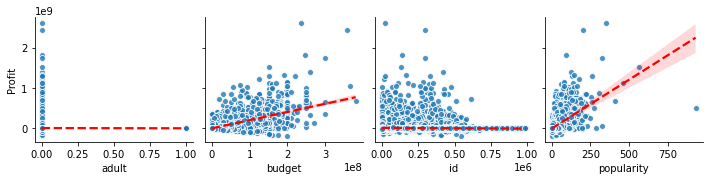

In [23]:
sns.pairplot(df, y_vars='Profit', kind='reg', x_vars=cols[:4],
            plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                         scatter_kws={'edgecolor':'white','lw':1}));

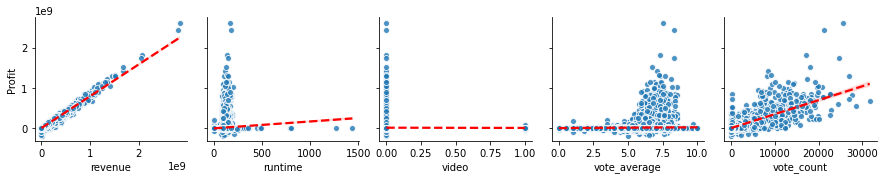

In [24]:
sns.pairplot(df, y_vars='Profit', kind='reg', x_vars=cols[4:],
            plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                         scatter_kws={'edgecolor':'white','lw':1}));

Based on the scatterplots, we can drop the following columns from our model: adult, id, video, and vote average. These features do not appear to have a linear relationship with our target variable. 

**Data Preprocessing**

In [21]:
y = df['Profit']
X = df.drop(columns=['Profit'])
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)